In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import string
import re

In [5]:
ld = pd.read_csv("Language/Language Detection.csv")


In [6]:
ld.head(10)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


## Cleaning these Punctuation

In [7]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
def remove_punctuation(text):
    for p in string.punctuation:
        
        text = text.replace(p, "") # remove punctuations
        text = re.sub(r"\d+", "", text) # remove digits
        
        
    text = text.lower() # text in lowercase
    return text

In [10]:
ld['Text'] = ld["Text"].apply(remove_punctuation)

In [11]:
ld.head(10)

,Text,Language
0,nature in the broadest sense is the natural p...,English
1,nature can refer to the phenomena of the physi...,English
2,the study of nature is a large if not the only...,English
3,although humans are part of nature human activ...,English
4,the word nature is borrowed from the old fren...,English
5,in ancient philosophy natura is mostly used a...,English
6,\nthe concept of nature as a whole the physic...,English
7,during the advent of modern scientific method ...,English
8,with the industrial revolution nature increas...,English
9,however a vitalist vision of nature closer to ...,English


In [12]:
remove_punctuation("[1] The word nature is borrowed from the Old F...")

' the word nature is borrowed from the old f'

In [13]:
ld["Language"].unique()

array(['English', 'Malayalam', 'Hindi', 'Tamil', 'Portugeese', 'French',
       'Dutch', 'Spanish', 'Greek', 'Russian', 'Danish', 'Italian',
       'Turkish', 'Sweedish', 'Arabic', 'German', 'Kannada'], dtype=object)

In [14]:
ld.head(10)

,Text,Language
0,nature in the broadest sense is the natural p...,English
1,nature can refer to the phenomena of the physi...,English
2,the study of nature is a large if not the only...,English
3,although humans are part of nature human activ...,English
4,the word nature is borrowed from the old fren...,English
5,in ancient philosophy natura is mostly used a...,English
6,\nthe concept of nature as a whole the physic...,English
7,during the advent of modern scientific method ...,English
8,with the industrial revolution nature increas...,English
9,however a vitalist vision of nature closer to ...,English


## train-test set split

In [15]:
from sklearn.model_selection import train_test_split
from sklearn import feature_extraction
from sklearn import pipeline
from sklearn import linear_model


In [16]:
X = ld.iloc[:, 0]
y = ld.iloc[: ,1]

In [17]:
X

0         nature in the broadest sense is the natural p...
1        nature can refer to the phenomena of the physi...
2        the study of nature is a large if not the only...
3        although humans are part of nature human activ...
4         the word nature is borrowed from the old fren...
                               ...                        
10332    ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333    ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334    ಹೇಗೆ  ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎಲ...
10335    ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...
10336    ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...
Name: Text, Length: 10337, dtype: object

In [18]:
y

0        English
1        English
2        English
3        English
4        English
          ...   
10332    Kannada
10333    Kannada
10334    Kannada
10335    Kannada
10336    Kannada
Name: Language, Length: 10337, dtype: object

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [20]:
vec = feature_extraction.text.TfidfVectorizer(ngram_range=(1,3), analyzer= "char")

In [21]:
model = pipeline.Pipeline([("vec",vec), ('clf', linear_model.LogisticRegression())])

In [22]:
model.fit(X_train, y_train)

Pipeline(steps=[('vec', TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('clf', LogisticRegression())])

In [23]:
predict = model.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [25]:
accuracy_score(y_test, predict) * 100

98.88781431334623

In [26]:
con_matrix = confusion_matrix(y_test, predict)
con_matrix

array([[ 95,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   1],
       [  0,  75,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   1,   0,   0],
       [  0,   0, 103,   1,   0,   0,   0,   0,   0,   0,   0,   1,   0,
          0,   0,   0,   0],
       [  0,   0,   1, 303,   1,   0,   0,   0,   3,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0, 215,   0,   0,   0,   3,   0,   0,   0,   0,
          1,   0,   0,   1],
       [  0,   0,   0,   0,   0,  96,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  80,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  19,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 139,   0,   0,   1,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  68,   0,   0,   0,
         

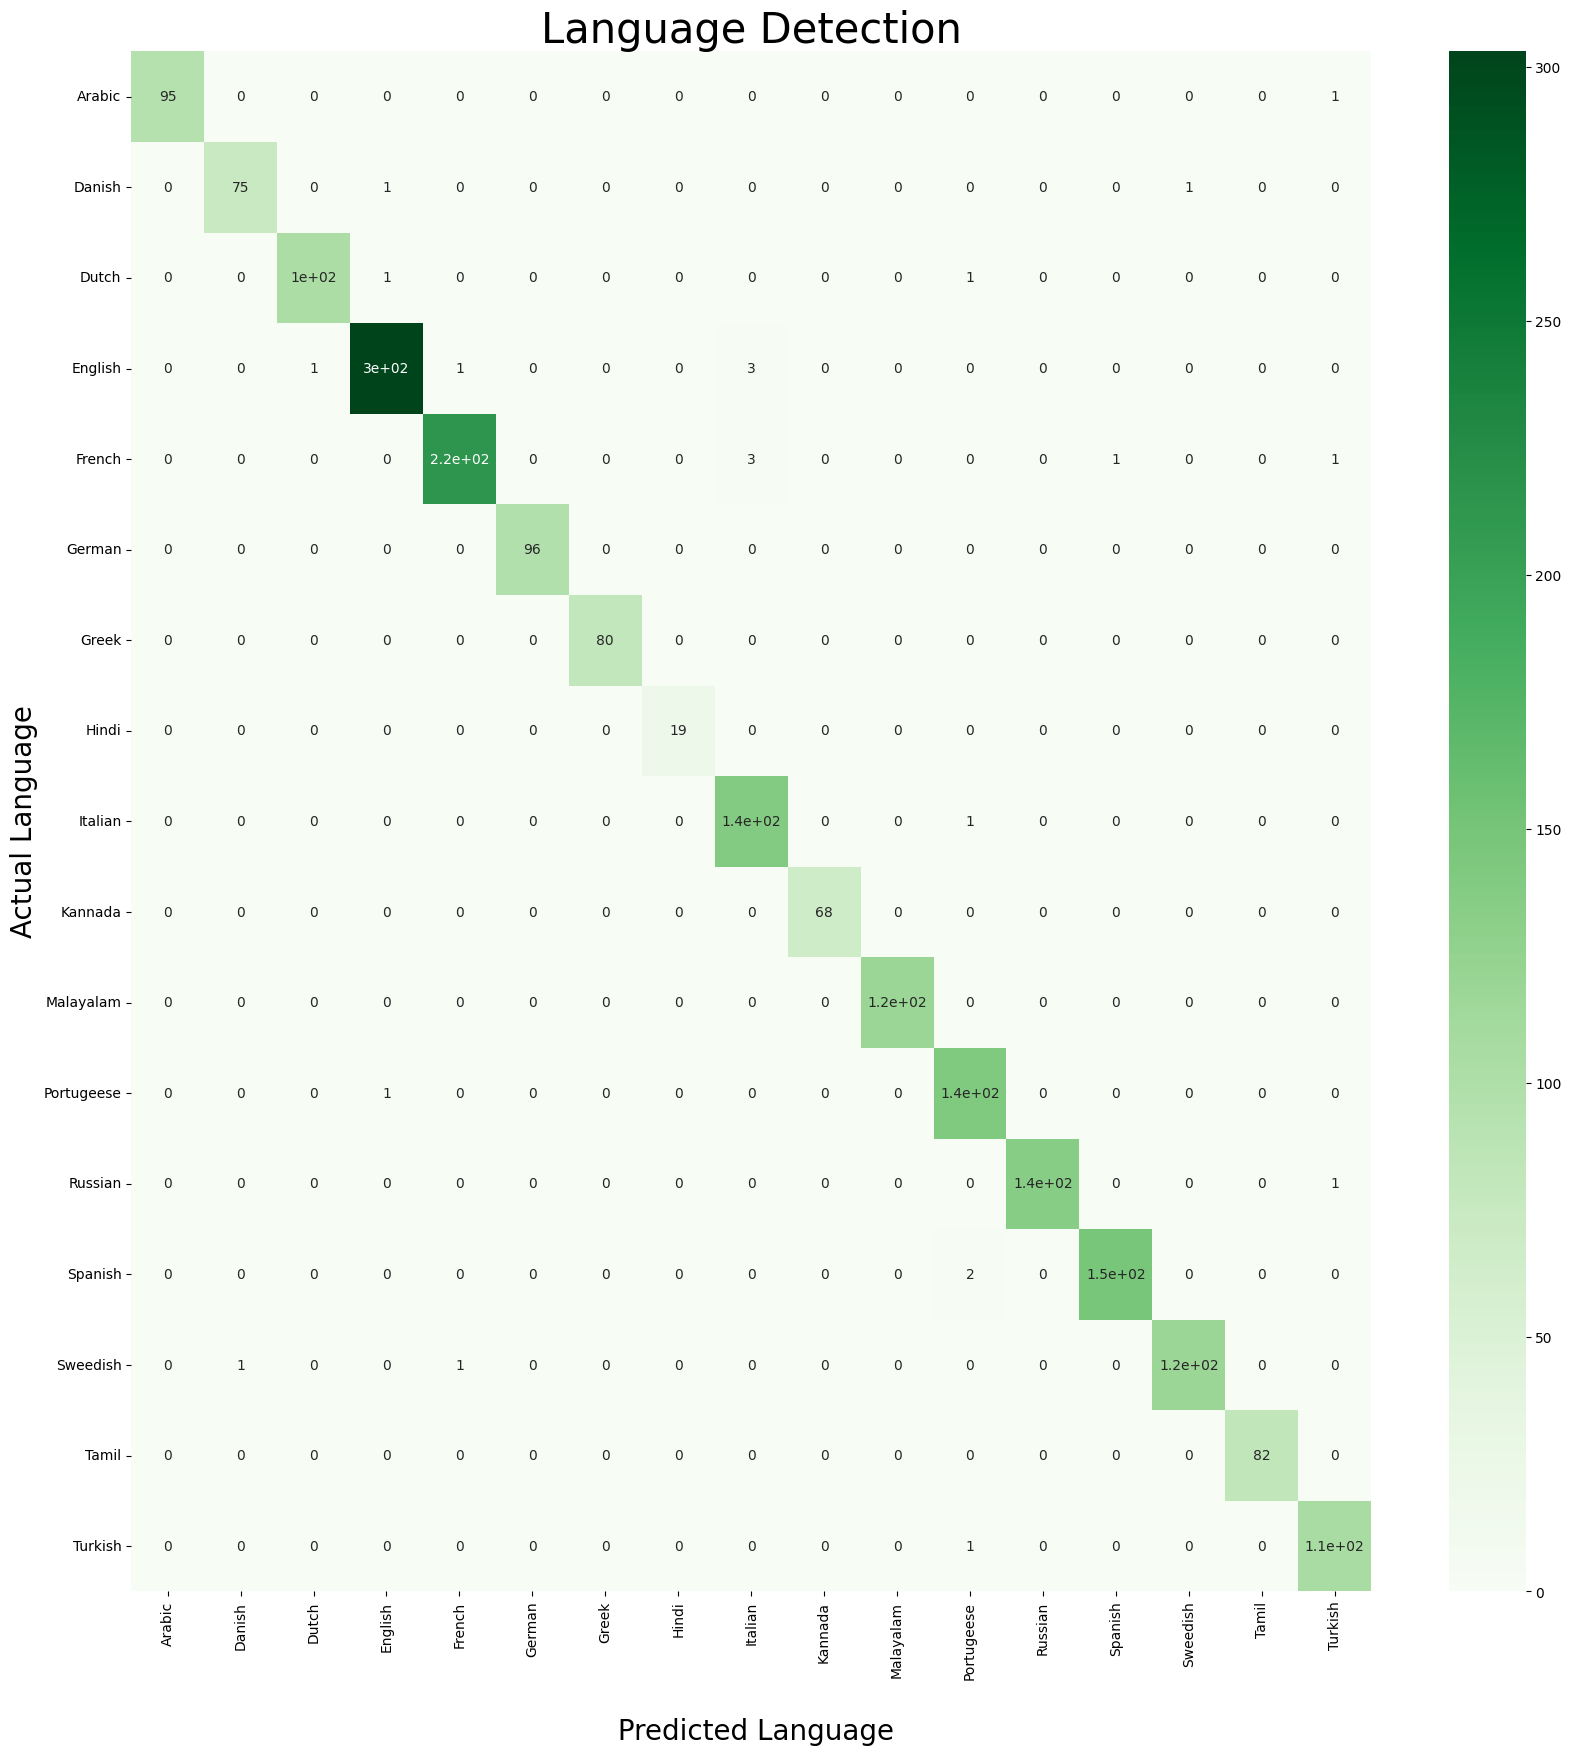

In [27]:
plt.figure(figsize = (20,20))
ax = sns.heatmap(con_matrix, annot =True, cmap = "Greens")
ax.set_title("Language Detection", fontsize = 30)
ax.set_xlabel('\n Predicted Language', fontsize = 20)
ax.xaxis.set_label_position =('bottom')
plt.xticks(rotation = 90)
ax.xaxis.set_ticklabels(model.classes_, fontsize = 10)

ax.set_ylabel('Actual Language', fontsize = 20)
plt.yticks(rotation = 0)
ax.yaxis.set_ticklabels(model.classes_, fontsize = 10)

plt.show()

In [28]:
model.predict([ "जन्माष्टमी पर सबको भेजें ये खास शुभकामना संदेश"])

array(['Hindi'], dtype=object)

In [29]:
import pickle

In [30]:
pickle.dump(model, open('language_model.pkl', 'wb'))

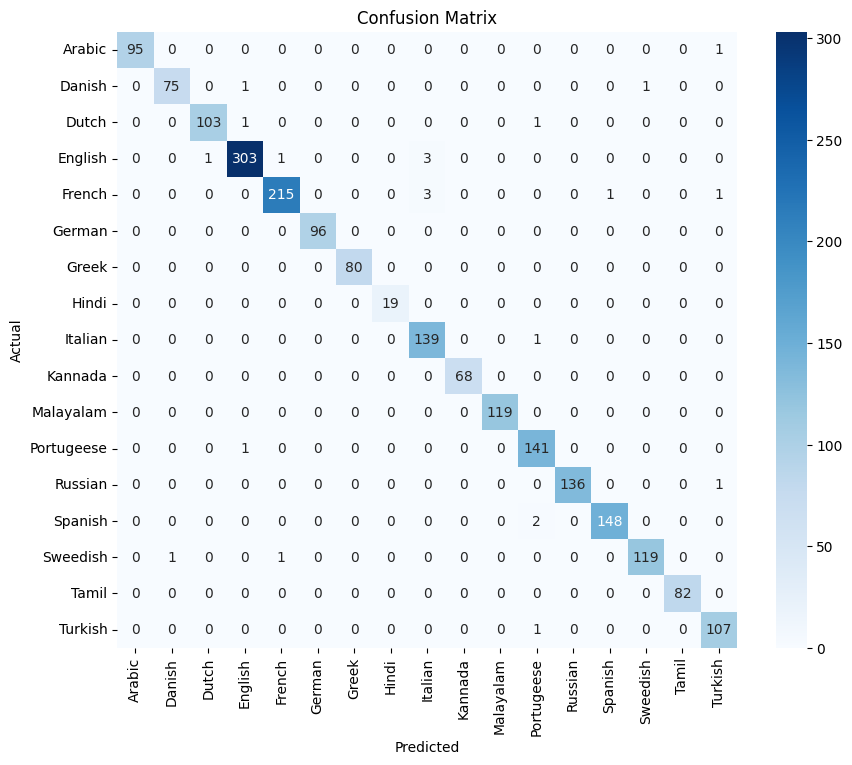

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from sklearn.model_selection import train_test_split
from sklearn import feature_extraction
from sklearn import pipeline
from sklearn import linear_model
from sklearn.metrics import accuracy_score, confusion_matrix
import tkinter as tk
from tkinter import messagebox, ttk
from googletrans import Translator

# Load and preprocess data
ld = pd.read_csv("Language/Language Detection.csv")

def remove_punctuation(text):
    text = ''.join([char for char in text if char not in string.punctuation])
    text = re.sub(r'\d+', '', text)
    text = text.lower()
    return text

ld['Text'] = ld["Text"].apply(remove_punctuation)

X = ld.iloc[:, 0]
y = ld.iloc[:, 1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

vec = feature_extraction.text.TfidfVectorizer(ngram_range=(1,3), analyzer="char")

model = pipeline.Pipeline([("vec", vec), ('clf', linear_model.LogisticRegression())])

model.fit(X_train, y_train)

predict = model.predict(X_test)

accuracy = accuracy_score(y_test, predict) * 100
con_matrix = confusion_matrix(y_test, predict)

# Initialize the translator
translator = Translator()

# Create Tkinter UI
class LanguageDetectionApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Language Detection and Translation")

        self.label = tk.Label(root, text="Enter text for detection and translation:")
        self.label.pack()

        self.text_entry = tk.Entry(root, width=100)
        self.text_entry.pack()

        self.detect_button = tk.Button(root, text="Detect Language", command=self.detect_language)
        self.detect_button.pack()

        self.language_label = tk.Label(root, text="")
        self.language_label.pack()

        self.translate_to_label = tk.Label(root, text="Translate to:")
        self.translate_to_label.pack()

        self.language_options = ttk.Combobox(root, values=["English", "French", "Hindi", "Spanish"])
        self.language_options.set("English")
        self.language_options.pack()

        self.translate_button = tk.Button(root, text="Translate", command=self.translate_text)
        self.translate_button.pack()

        self.translated_text_entry = tk.Entry(root, width=100)
        self.translated_text_entry.pack()

        self.accuracy_label = tk.Label(root, text=f"Model Accuracy: {accuracy:.2f}%")
        self.accuracy_label.pack()

        self.show_confusion_matrix_button = tk.Button(root, text="Show Confusion Matrix", command=self.show_confusion_matrix)
        self.show_confusion_matrix_button.pack()

    def detect_language(self):
        input_text = self.text_entry.get()
        if not input_text:
            messagebox.showwarning("Input Error", "Please enter some text to detect the language.")
            return
        
        prediction = model.predict([input_text])
        self.language_label.config(text=f"Detected Language: {prediction[0]}")

    def translate_text(self):
        input_text = self.text_entry.get()
        if not input_text:
            messagebox.showwarning("Input Error", "Please enter some text to translate.")
            return

        target_language = self.language_options.get().lower()
        language_map = {"english": "en", "french": "fr", "hindi": "hi", "spanish": "es"}

        detected_language = translator.detect(input_text).lang
        self.language_label.config(text=f"Detected Language: {detected_language}")

        if target_language in language_map:
            translated_text = translator.translate(input_text, src=detected_language, dest=language_map[target_language])
            self.translated_text_entry.delete(0, tk.END)  # Clear the entry field
            self.translated_text_entry.insert(0, translated_text.text)  # Insert the translated text
        else:
            self.translated_text_entry.delete(0, tk.END)
            self.translated_text_entry.insert(0, "Invalid target language selected.")

    def show_confusion_matrix(self):
        fig, ax = plt.subplots(figsize=(10, 8))
        sns.heatmap(con_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.show()

if __name__ == "__main__":
    root = tk.Tk()
    app = LanguageDetectionApp(root)
    root.mainloop()